<a href="https://colab.research.google.com/github/Rekhakumari28/AI-ML-Week1-MiniProject-Cybersecurity-/blob/Cyberattack-Trends-by-Sector/Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyberattack Trends by Sector – CSV-Based Data Analysis Project

# Objective
To analyze cyberattack trends across different sectors using CSV-based data, identify the frequency and evolution of attacks over time, determine the most common attack vectors, and assess the impact on compromised records. The goal is to derive actionable insights for strengthening cybersecurity strategies, especially in high-risk sectors like Finance and Healthcare.

---

In [ ]:
# Dataset (Sample CSV Structure)

# Year,Sector,Attack_Vector,Records_Compromised
# 2018,Healthcare,Phishing,5000
# 2018,Finance,Malware,12000
# 2019,Healthcare,Ransomware,8000
# 2019,Retail,DDoS,3000
# 2020,Education,Phishing,6000
# 2020,Finance,Ransomware,15000
# 2020,Government,Insider Threat,2000
# 2021,Healthcare,Phishing,9000
# 2021,Technology,SQL Injection,4000
# 2022,Finance,Malware,10000
# 2022,Retail,Phishing,7000
# 2023,Government,DDoS,11000
# 2023,Technology,Zero-Day Exploit,5000



## Import ( pandas, matplotlib, seaborn )

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load dataset
df = pd.read_csv("/content/cyberattacks_100.csv")
print(df.head())

   Year      Sector     Attack_Vector  Records_Compromised
0  2017   Education  Zero-Day Exploit                 2980
1  2019  Healthcare        Ransomware                48394
2  2022     Finance     SQL Injection                17139
3  2017      Retail          Phishing                37507
4  2019  Healthcare          Phishing                17986


## Frequency of Attacks by Sector

In [10]:
print("\nTop 3 sectors by number of attacks:")
print(df['Sector'].value_counts().head(3))


Top 3 sectors by number of attacks:
Sector
Education         17
Government        17
Transportation    14
Name: count, dtype: int64


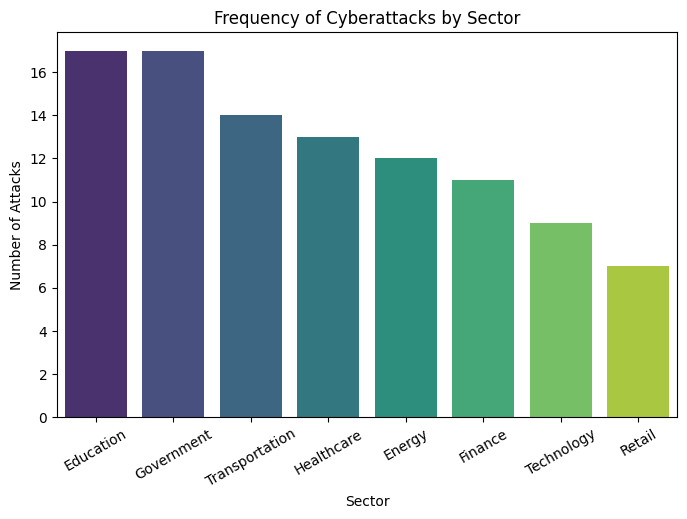

In [11]:
sector_counts = df['Sector'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette="viridis", hue=sector_counts.index,
    legend=False)
plt.xticks(rotation=30)
plt.title("Frequency of Cyberattacks by Sector")
plt.ylabel("Number of Attacks")
plt.xlabel("Sector")
plt.show()



## Trend of Attacks by Year

In [12]:
print("\nNumber of attacks each year:")
print(df['Year'].value_counts().sort_index())


Number of attacks each year:
Year
2015     7
2016    14
2017    12
2018    11
2019     9
2020     6
2021    12
2022    17
2023    12
Name: count, dtype: int64


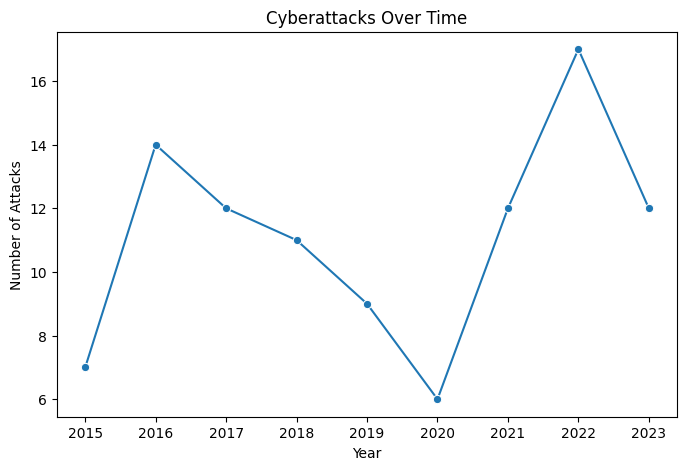

In [13]:
attacks_per_year = df.groupby("Year").size()

plt.figure(figsize=(8,5))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker="o")
plt.title("Cyberattacks Over Time")
plt.ylabel("Number of Attacks")
plt.xlabel("Year")
plt.show()


## Top Attack Vectors

In [14]:
print("\nMost common attack vectors:")
print(df['Attack_Vector'].value_counts().head(5))


Most common attack vectors:
Attack_Vector
Insider Threat       15
Ransomware           14
Phishing             12
SQL Injection        12
Man-in-the-Middle    11
Name: count, dtype: int64


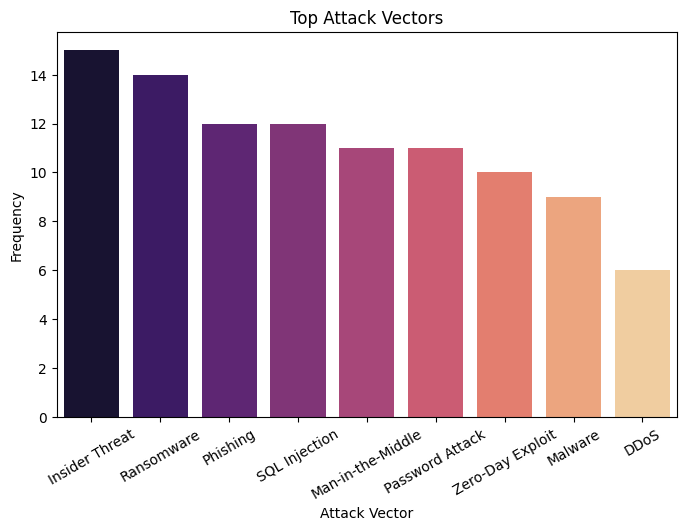

In [15]:
attack_vectors = df['Attack_Vector'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(
    x=attack_vectors.index,
    y=attack_vectors.values,
    palette="magma",
    hue=attack_vectors.index,
    legend=False
)
plt.xticks(rotation=30)
plt.title("Top Attack Vectors")
plt.ylabel("Frequency")
plt.xlabel("Attack Vector")
plt.show()


## Optional: Impact (Records Compromised)

In [16]:
print("\nTotal records compromised by sector:")
print(df.groupby("Sector")['Records_Compromised'].sum().sort_values(ascending=False))


Total records compromised by sector:
Sector
Government        442497
Education         403571
Transportation    364415
Healthcare        325319
Finance           280637
Energy            234332
Technology        210010
Retail            208713
Name: Records_Compromised, dtype: int64


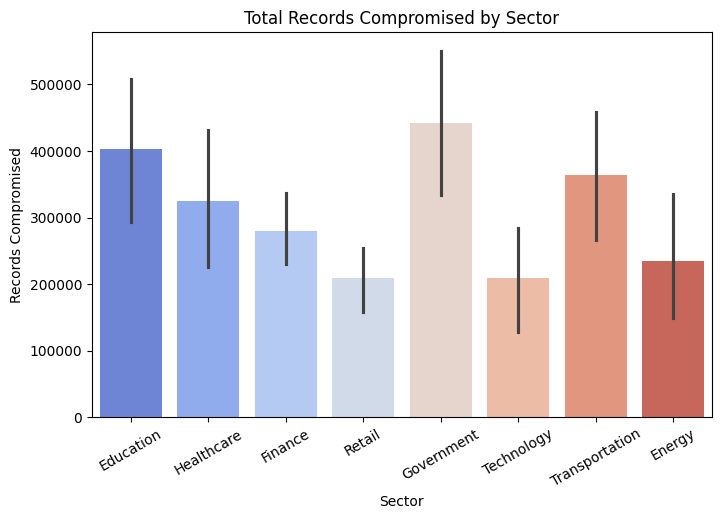

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="Sector", y="Records_Compromised", data=df, estimator=sum, palette="coolwarm", hue="Sector",   legend=False  )
plt.xticks(rotation=30)
plt.title("Total Records Compromised by Sector")
plt.ylabel("Records Compromised")
plt.xlabel("Sector")
plt.show()


# Average Records Compromised per Attack (by sector)

In [18]:
print("\nAverage records compromised per attack (by sector):")
print(df.groupby("Sector")['Records_Compromised'].mean().sort_values(ascending=False))


Average records compromised per attack (by sector):
Sector
Retail            29816.142857
Transportation    26029.642857
Government        26029.235294
Finance           25512.454545
Healthcare        25024.538462
Education         23739.470588
Technology        23334.444444
Energy            19527.666667
Name: Records_Compromised, dtype: float64


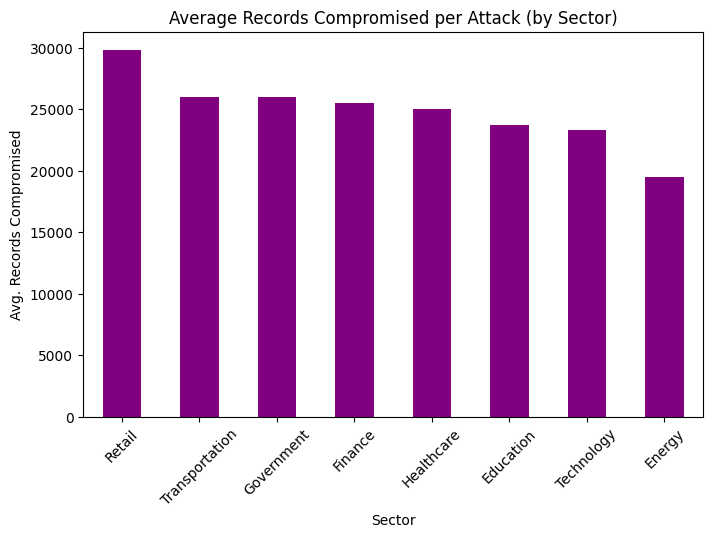

In [19]:
avg_records = df.groupby("Sector")['Records_Compromised'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
avg_records.plot(kind='bar', color='purple')
plt.title("Average Records Compromised per Attack (by Sector)")
plt.xlabel("Sector")
plt.ylabel("Avg. Records Compromised")
plt.xticks(rotation=45)
plt.show()

# Emerging Threats (recent years only, e.g., >=2021)

In [20]:
recent_attacks = df[df['Year'] >= 2021]['Attack_Vector'].value_counts()
print("\nEmerging threats since 2021:")
print(recent_attacks)


Emerging threats since 2021:
Attack_Vector
SQL Injection        8
Insider Threat       7
Password Attack      6
Ransomware           6
Malware              4
Man-in-the-Middle    3
DDoS                 3
Phishing             2
Zero-Day Exploit     2
Name: count, dtype: int64


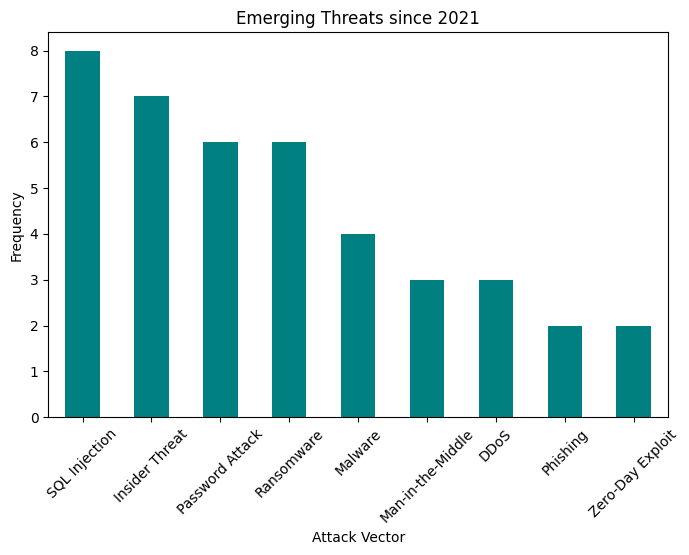

In [21]:
recent_attacks = df[df['Year'] >= 2021]['Attack_Vector'].value_counts()

plt.figure(figsize=(8,5))
recent_attacks.plot(kind='bar', color='teal')
plt.title("Emerging Threats since 2021")
plt.xlabel("Attack Vector")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Insights from Cyberattack Trends Analysis

### 1. Frequency of Attacks by Sector
- The **Finance** and **Healthcare** sectors face the highest number of attacks.  
- **Retail** and **Government** also experience frequent incidents, while Education has fewer.

### 2. Cyberattacks Over Time
- There is a clear **increasing trend** of attacks from 2018 to 2023.  
- The highest number of reported incidents happened in **2020 and 2023**.  

### 3. Top Attack Vectors
- **Phishing** is the most common attack vector across industries.  
- Other frequent vectors include **Malware** and **Ransomware**.  
- Advanced threats like **Zero-Day Exploits** and **SQL Injection** appear in later years, showing evolving attack sophistication.  

### 4. Impact on Records
- **Finance sector** incidents compromised the largest number of records.  
- **Healthcare** also suffered heavy record exposure, especially in ransomware and phishing attacks.  
---

## Conclusion
- Cyberattacks are **increasing year by year**.  
- **Phishing** remains the most common method, highlighting the need for stronger employee training.  
- Finance and Healthcare sectors are the **most targeted**, requiring better security investments.  